# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a90b6518>,
      dtype=object)

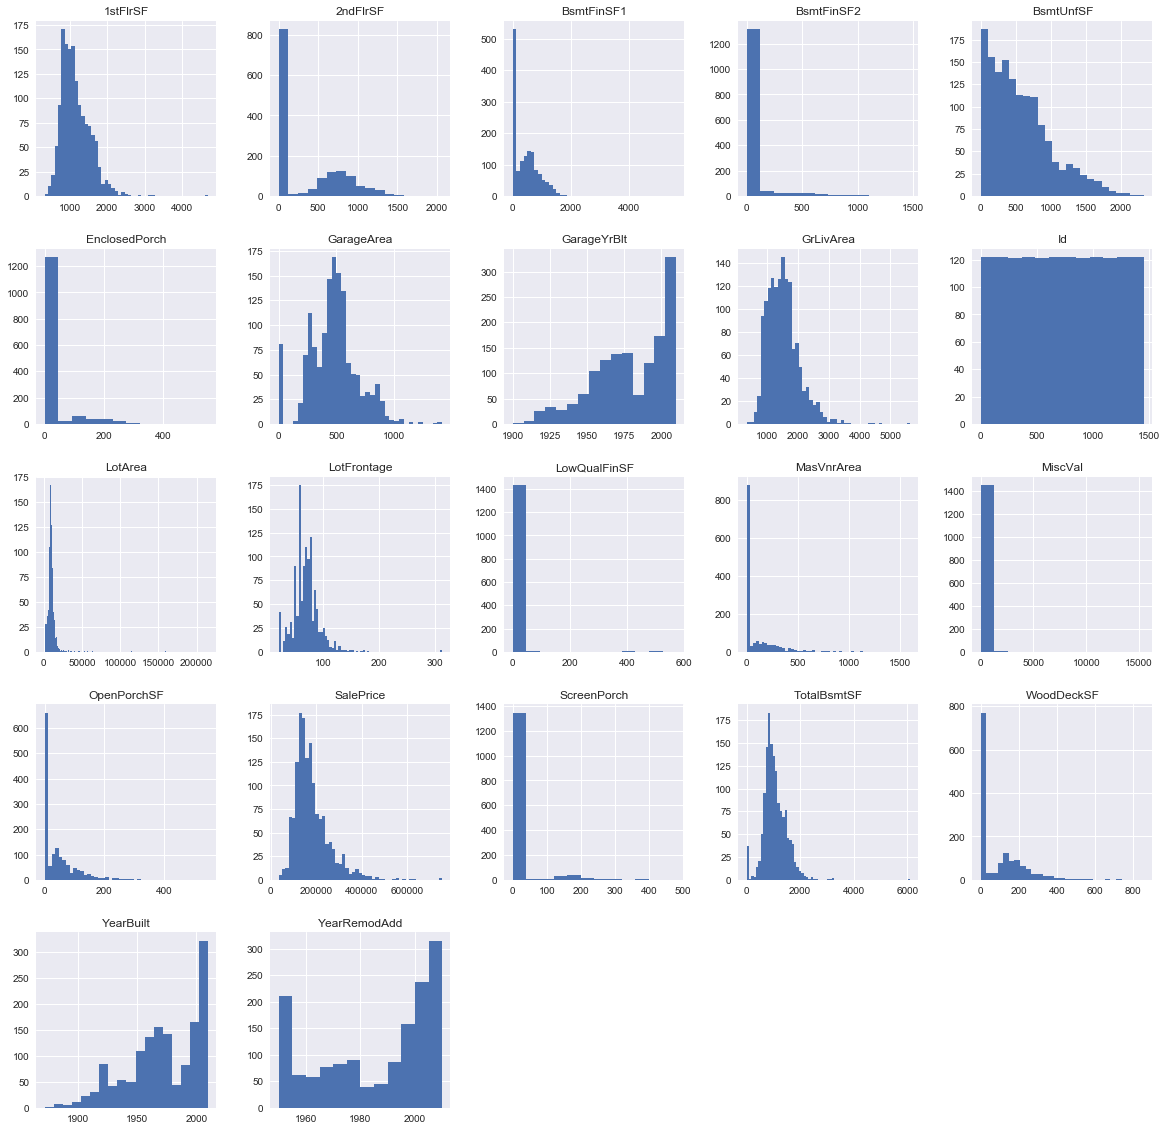

In [18]:
# Your code here
#ames.hist(figsize=[16,16])
ames_cont = ames.loc[:, (ames.nunique() > 20) & (ames.dtypes != 'object')]
ames_cont

ames_cont.hist(figsize=[20,20], bins='auto')


We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [24]:
# Select non zero-inflated continuous features as ames_cont

continuous = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']

ames_cont2 = ames_cont[continuous]
ames_cont2

,LotFrontage,LotArea,YearBuilt,1stFlrSF,GrLivArea,SalePrice
0,65.0,8450,2003,856,1710,208500
1,80.0,9600,1976,1262,1262,181500
2,68.0,11250,2001,920,1786,223500
3,60.0,9550,1915,961,1717,140000
4,84.0,14260,2000,1145,2198,250000
...,...,...,...,...,...,...
1455,62.0,7917,1999,953,1647,175000
1456,85.0,13175,1978,2073,2073,210000
1457,66.0,9042,1941,1188,2340,266500
1458,68.0,9717,1950,1078,1078,142125


## Perform log transformations for the variables where it makes sense

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff98fb4fac8>,
      dtype=object)

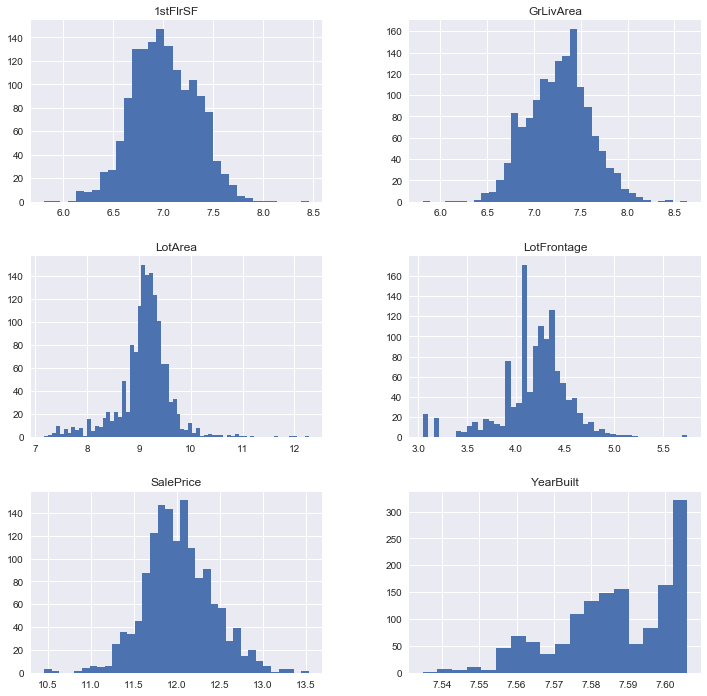

In [28]:
# Your code here
import numpy as np

ames_log = np.log(ames_cont2)
ames_log.hist(figsize=[12,12], bins='auto')


## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

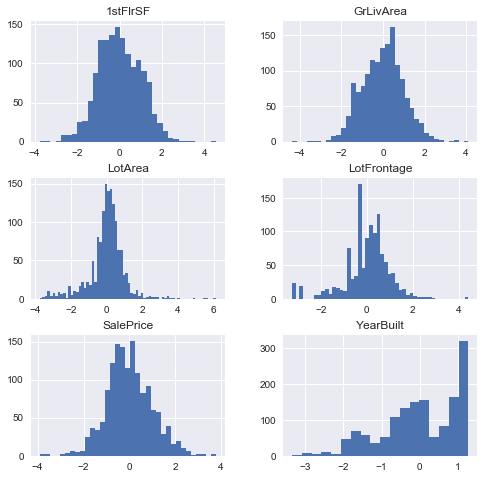

In [38]:
# Your code here
# from sklearn.preprocessing import normalize

# #scalar = StandardScaler()
# #scalar.fit(ames_cont2)
# ames_cont2 = ames_cont2.dropna()
# features_final = normalize(ames_cont2)
# features_final




# SOLUTION
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = ames_log.apply(normalize)

features_final.hist(figsize  = [8, 8], bins='auto');

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!